## Vaccination analysis
The main purpose of this notebook is to analyze the effectiveness of a mass vaccination program.

We use Israeli Ministry of Health vaccine and hospital data to measure correlations between vaccinations and hospitalizations.

Right now you can see a mild correlation in the hospital data (which ends in 1/24) showing that hospitalization age is declining. It is expected as more data is released that this correlation will become more pronounced. 

In [1]:
# Uncomment this line below if you get errors about imports:
#!pip install pandas seaborn numpy openpyxl

# You may also need to have nodejs installed, and if you are using jupyterlab, this too.
# Otherwise you will not see the graphs:
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager --no-build
#!jupyter labextension install jupyterlab-plotly --no-build

from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns

pd.plotting.register_matplotlib_converters()    
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize': (16, 6)})

In [2]:
translated_columns = ['Date', 'Hospitalized', 'Percentage of hospitalized women', 'Average age of hospitalized',
        'Standard age deviation of hospitalized', 'Ventilated', 'Percentage of ventilated women',
        'Average age of ventilated', 'Standard deviation of ventilated age', 'Mild patients',
        'Percentage of women with mild illness', 'Average age of mild patients', 'Standard deviation of mild age',
        'Moderate patients', 'Percentage of moderately ill women', 'Average age of average patients',
        'Standard deviation of middle age patients', 'Severe patients', 'Percentage of severely ill women',
        'Average age of severe patients',' Standard Deviation of severe patients Age', 'Cumulative severe patients']
        
hospital_data = pd.read_csv(glob('israel_data/corona_hospitalization*')[0], names=translated_columns, header=0)

vaccine_data = pd.read_csv(glob('israel_data/vaccinated-per-day*')[0], 
                           dtype={'first_dose': 'Int64', 'second_dose': 'Int64'},
                           na_values='<15'
                          ).fillna(0)

# This code sets up the line graphs
def lineplot(x, y):    
    plot = sns.lineplot(x=x, y=y)
    for i, label in enumerate(plot.get_xticklabels()):
        if i % 28 == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)
    return plot

In [3]:
vaccine_data.groupby(['age_group']).sum()

,first_dose,second_dose
age_group,,
0-19,72413,9573
20-29,239760,65851
30-39,275001,93269
40-49,483091,144452
50-59,503787,196395
60-69,541430,377043
70-79,419969,319715
80-89,186869,137728
90+,43788,32124


<AxesSubplot:xlabel='VaccinationDate', ylabel='first_dose'>

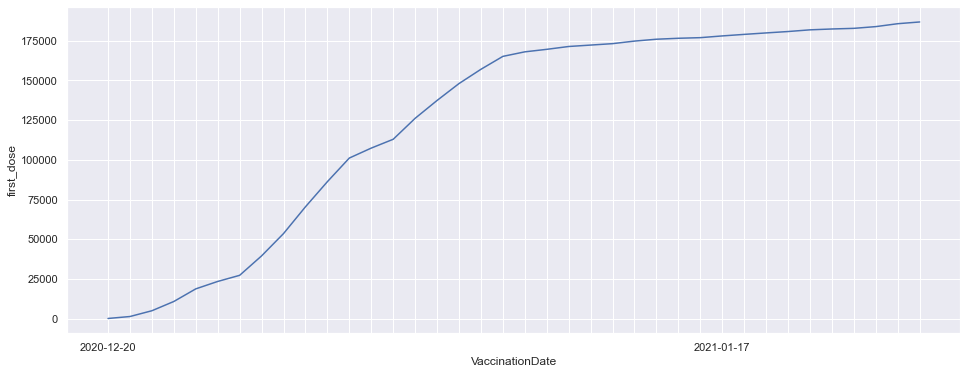

In [4]:
# Show line graph for 80-90 vaccinations

vaccines_80to89 = vaccine_data[vaccine_data.age_group == '80-89']
first_dose = vaccines_80to89['first_dose'].cumsum().astype('Int64')
second_dose = vaccines_80to89['second_dose'].cumsum().astype('Int64')

lineplot(vaccines_80to89['VaccinationDate'], first_dose)

<AxesSubplot:xlabel='VaccinationDate', ylabel='second_dose'>

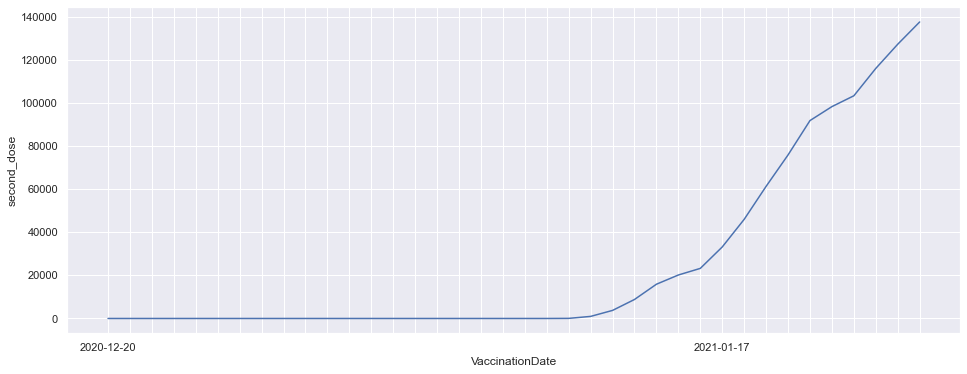

In [5]:
lineplot(vaccines_80to89['VaccinationDate'], second_dose)

<AxesSubplot:xlabel='VaccinationDate', ylabel='first_dose'>

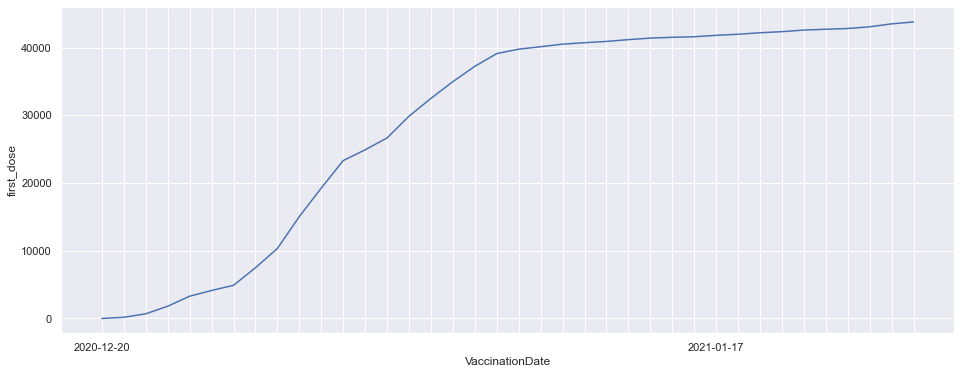

In [6]:
# Show line graph for 90+ vaccinations

vaccines_90plus = vaccine_data[vaccine_data.age_group == '90+']
first_dose = vaccines_90plus['first_dose'].cumsum().astype('Int64')

lineplot(vaccines_90plus['VaccinationDate'], first_dose)

<AxesSubplot:xlabel='VaccinationDate', ylabel='first_dose'>

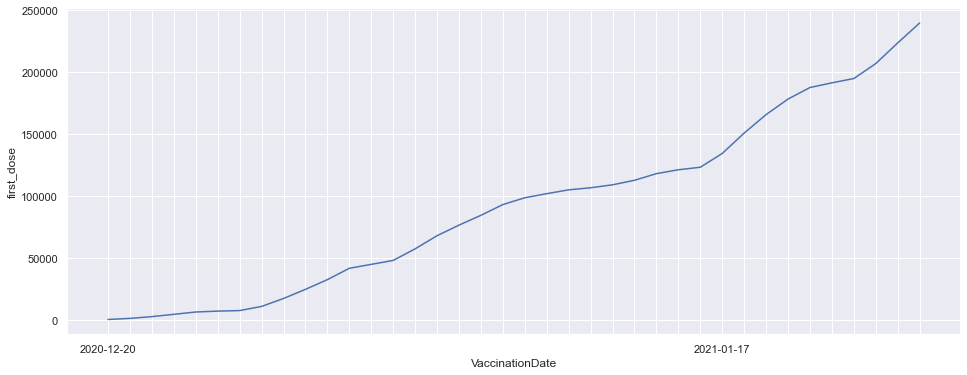

In [7]:
# Show line graph for 20-29 vaccinations

vaccines_20to29 = vaccine_data[vaccine_data.age_group == '20-29']
first_dose = vaccines_20to29['first_dose'].cumsum().astype('Int64')

lineplot(vaccines_20to29['VaccinationDate'], first_dose)

<AxesSubplot:xlabel='Date', ylabel='Hospitalized'>

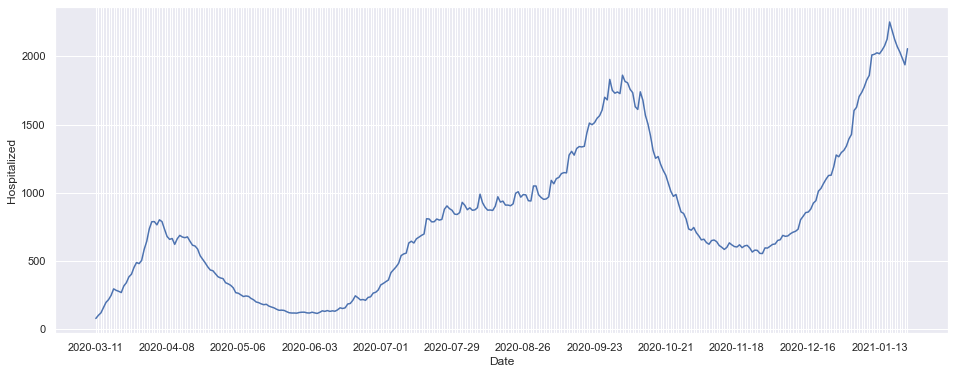

In [8]:
lineplot(hospital_data['Date'], hospital_data['Hospitalized'])

<AxesSubplot:xlabel='Date', ylabel='Average age of hospitalized'>

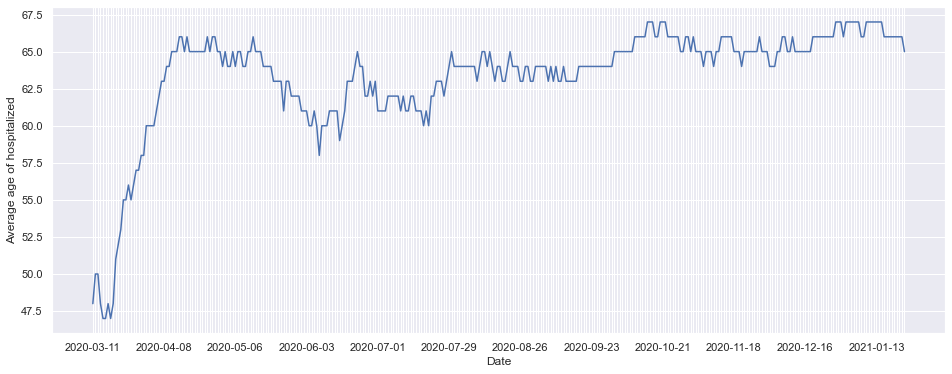

In [9]:
lineplot(hospital_data['Date'], hospital_data['Average age of hospitalized'])

<AxesSubplot:xlabel='Date', ylabel='Average age of mild patients'>

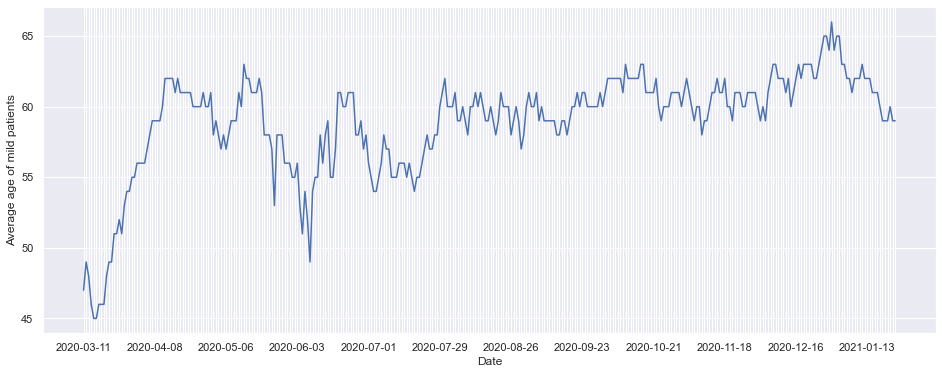

In [10]:
lineplot(hospital_data['Date'], hospital_data['Average age of mild patients'])

<AxesSubplot:xlabel='Date', ylabel='Average age of average patients'>

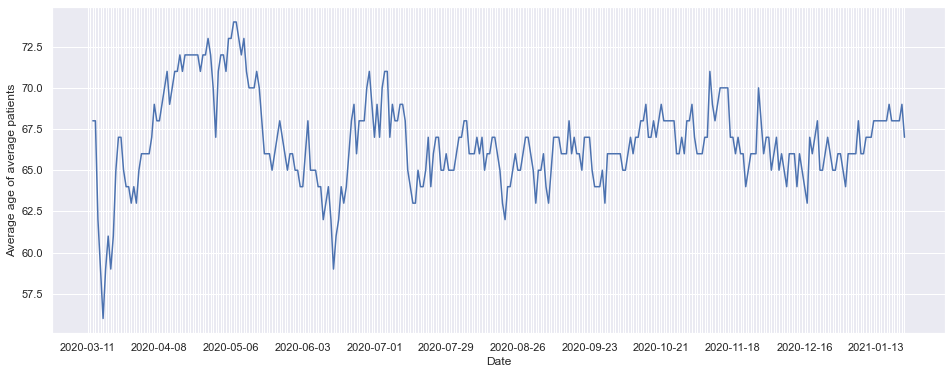

In [11]:
lineplot(hospital_data['Date'], hospital_data['Average age of average patients'])

<AxesSubplot:xlabel='Date', ylabel='Average age of severe patients'>

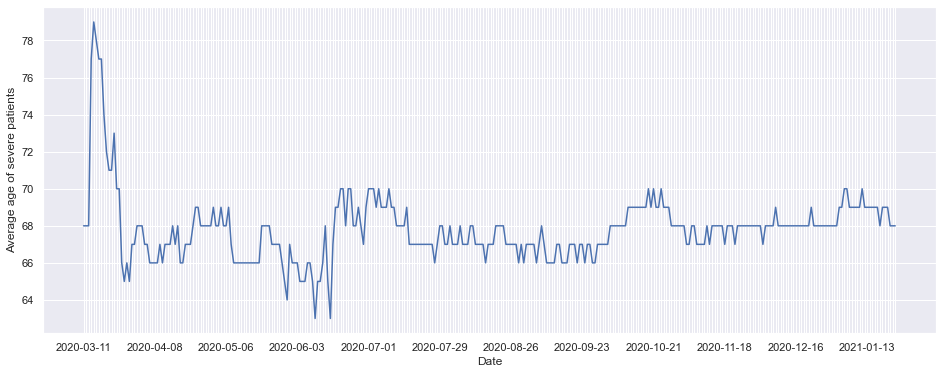

In [12]:
lineplot(hospital_data['Date'], hospital_data['Average age of severe patients'])

<AxesSubplot:xlabel='Date', ylabel='Average age of ventilated'>

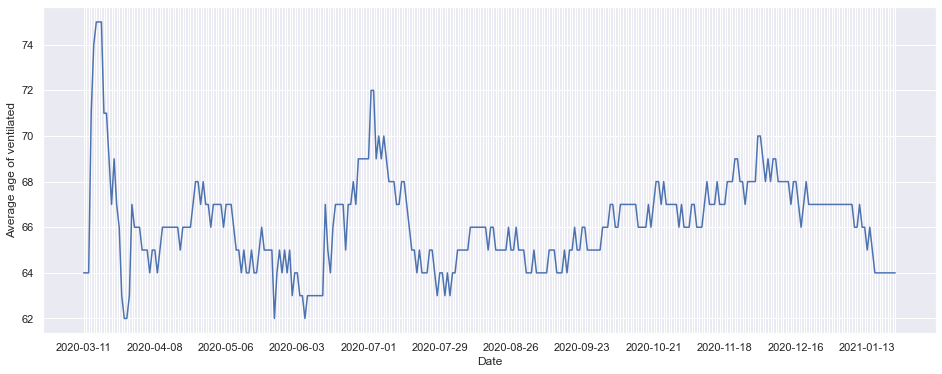

In [13]:
lineplot(hospital_data['Date'], hospital_data['Average age of ventilated'])